In [6]:
import pandas as pd
#cat

In [7]:
df = pd.read_csv('Created CSVs/Cleaned_For_Analysis_All_Data.csv')

In [8]:
df.columns

Index([u'Unnamed: 0', u'Date', u'Time', u'Weather & Air Temp:', u'Water Temp:',
       u'Corrected Water Temp:', u'pH', u'Corrected pH', u'DO',
       u'Corrected DO', u'Turbidity', u'Salinity', u'Corrected Salinity',
       u'Tide is moving', u'Tide Times', u'# Hauls', u'Corrected # Hauls',
       u'Common Name', u'Corrected Common Name',
       u'Grouped Corrected Common Name', u'Quantity', u'Corrected Quantity',
       u'Scientific Name', u'Instructors/ Seine Staff:',
       u'# student seiners (CLASSES ONLY)',
       u'# of visitors (Public Seine ONLY)', u'# Brought to Ed Center',
       u'Other info (Gender, Length, Dead/Alive, other physical description)',
       u'NOTES FROM SEINEING SEASON:', u'Battery Park Water Temp'],
      dtype='object')

In [10]:
dfnojelly = df[df['Corrected Common Name'] != 'comb jelly']

In [11]:
plt_df  = dfnojelly[['Date','Battery Park Water Temp']].drop_duplicates()

In [12]:
quant_df = dfnojelly[['Date', 'Corrected Quantity']].groupby('Date', as_index = False).sum()

In [13]:
pl_df = pd.merge(plt_df, quant_df, on='Date', how='inner')

In [14]:
import dateutil

In [15]:
pl_df['Year'] = [dateutil.parser.parse(x).year for x in pl_df['Date']]

In [16]:
pl_df = pl_df[pl_df['Year'] > 2010]

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [19]:
sns.set()

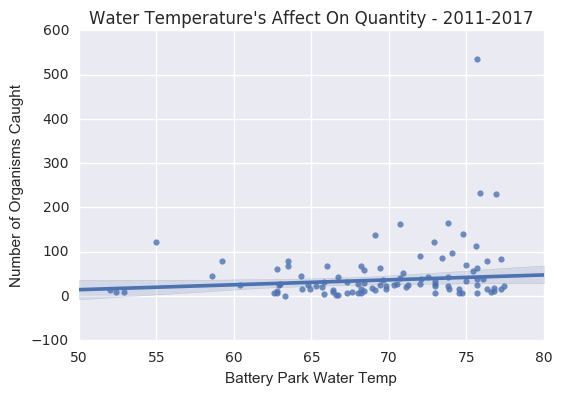

In [20]:
sns.regplot(pl_df['Battery Park Water Temp'], pl_df['Corrected Quantity'], robust = True)
plt.title("Water Temperature's Affect On Quantity - 2011-2017")
plt.ylabel("Number of Organisms Caught")
plt.savefig('Graphs/Battery_Temp_Affect_On_Quantity')

In [21]:
import numpy as np

In [22]:
len([x for x in pl_df['Battery Park Water Temp'] if x <= 60])

6

In [23]:
len([x for x in pl_df['Battery Park Water Temp'] if x >70])

46

In [24]:
pd.cut(list([float(x) for x in pl_df['Battery Park Water Temp']]), np.arange(0,1.0+50, 50))

[NaN, NaN, NaN, NaN, NaN, ..., NaN, NaN, NaN, NaN, NaN]
Length: 111
Categories (1, object): [(0, 50]]

In [25]:
a = pl_df.groupby(pd.cut(pl_df['Battery Park Water Temp'], range(50,85,5))).mean()['Corrected Quantity']

In [26]:
a

Battery Park Water Temp
(50, 55]    39.000000
(55, 60]    62.500000
(60, 65]    29.500000
(65, 70]    28.413793
(70, 75]    52.321429
(75, 80]    88.777778
Name: Corrected Quantity, dtype: float64

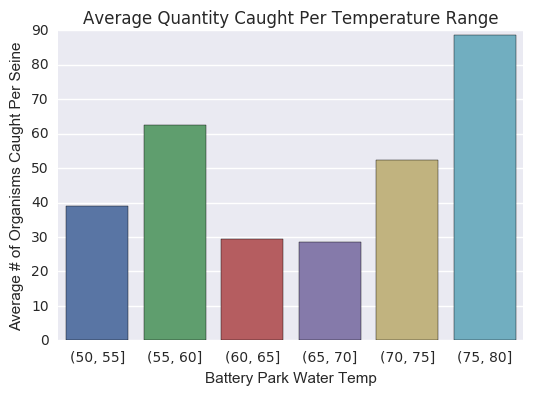

In [27]:
sns.barplot(a.index, list(a))
plt.title('Average Quantity Caught Per Temperature Range')
plt.ylabel('Average # of Organisms Caught Per Seine')
plt.savefig('Graphs/Battery_Temp_Affect_On_Quantity_Bar')

In [28]:
import statsmodels.api as sm

In [29]:
z_score, p_value = sm.stats.proportions_ztest([ 51, 37], [63, 20], alternative = 'larger')

TypeError: can't multiply sequence by non-int of type 'float'

In [ ]:
p_value

In [30]:
import scipy

In [31]:
scipy.stats.ttest_ind([x for x in pl_df['Battery Park Water Temp'] if x >75],[x for x in pl_df['Battery Park Water Temp'] if x >80])

Ttest_indResult(statistic=nan, pvalue=nan)

In [32]:
set(df['Date'])
caught_per_date = {}
for date in set(df['Date']):
    caught_per_date[date] = len(set(df[df['Date']==date]['Corrected Common Name']))

In [33]:
plt_df['Unique Species Caught'] = [caught_per_date[x] for x in plt_df['Date']]

In [34]:
plt_df.head()

,Date,Battery Park Water Temp,Unique Species Caught
0,2008-09-13,75.2,17
17,2009-06-20,70.0,11
28,2009-09-23,73.4,5
33,2010-06-12,64.4,9
42,2010-06-26,72.3,5


In [35]:
#plt_df = plt_df[plt_df['Battery Park Water Temp'] >62]

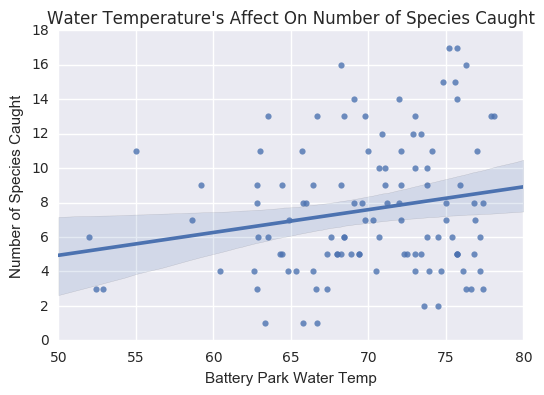

In [36]:
sns.regplot(plt_df['Battery Park Water Temp'], plt_df['Unique Species Caught'])
plt.title("Water Temperature's Affect On Number of Species Caught")
plt.ylabel("Number of Species Caught")
plt.savefig('Graphs/Battery_Temp_Affect_On_Species_Caught')

In [63]:
b = plt_df.groupby(pd.cut(plt_df['Battery Park Water Temp'], range(50,82,5))).mean()['Unique Species Caught']

In [64]:
c = plt_df.groupby(pd.cut(plt_df['Battery Park Water Temp'], range(50,82,5))).count()['Unique Species Caught']

In [65]:
c

Battery Park Water Temp
(50, 55]     4
(55, 60]     2
(60, 65]    15
(65, 70]    30
(70, 75]    34
(75, 80]    23
Name: Unique Species Caught, dtype: int64

In [66]:
b

Battery Park Water Temp
(50, 55]    5.750000
(55, 60]    8.000000
(60, 65]    6.333333
(65, 70]    7.233333
(70, 75]    7.941176
(75, 80]    8.565217
Name: Unique Species Caught, dtype: float64

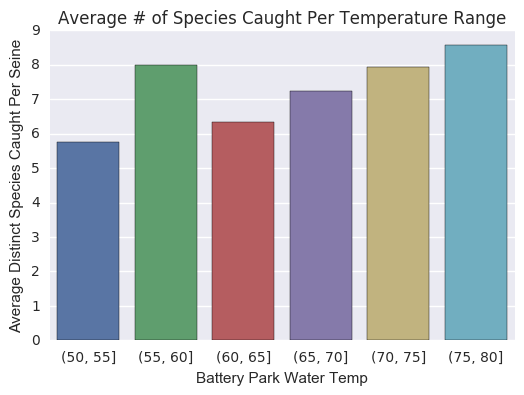

In [67]:
sns.barplot(b.index, list(b))
plt.title('Average # of Species Caught Per Temperature Range')
plt.ylabel('Average Distinct Species Caught Per Seine')
plt.savefig('Graphs/Battery_Temp_Affect_On_Species_Caught_Bar')